In [ ]:
#import required packages

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [3]:
import itertools
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras 

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing import text, sequence
from keras import utils

print("tensorflow version:", tf.__version__)

Using TensorFlow backend.


tensorflow version: 1.2.1


In [4]:
data = pd.read_csv("/Users/mkakarla/Downloads/01_dataresults.csv")

In [5]:
data.head()

,post,tags
0,responsive css - how to i make padding adjust ...,css
1,how to design a comment box similar to faceboo...,css
2,rapidshare like site loading how can i make p...,jquery
3,its possible put more of 1 name controls on a ...,jquery
4,envoking scheduled task or service in .net so...,.net


In [ ]:
#All 20 tags have 2000 posts. So no class imbalance problems

In [6]:
data['tags'].value_counts()

c++              2000
asp.net          2000
angularjs        2000
java             2000
android          2000
html             2000
sql              2000
.net             2000
php              2000
c                2000
css              2000
ruby-on-rails    2000
jquery           2000
objective-c      2000
c#               2000
python           2000
ios              2000
javascript       2000
mysql            2000
iphone           2000
Name: tags, dtype: int64

In [ ]:

# Split data into train and test 80-20

In [7]:

train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 32000
Test size: 8000


In [8]:
train_posts = data['post'][:train_size]
train_tags = data['tags'][:train_size]

test_posts = data['post'][train_size:]
test_tags = data['tags'][train_size:]

In [ ]:
# Defining length of tokenizer

In [9]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [10]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [ ]:
# Use sklearn utility to convert label strings to numbered index

In [11]:

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [ ]:

# Converts the labels to a one-hot representation

In [12]:

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [ ]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)

In [13]:

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (32000, 1000)
x_test shape: (8000, 1000)
y_train shape: (32000, 20)
y_test shape: (8000, 20)


In [ ]:
# This model trains with 5 epochs 
# Training for more epochs will likely lead to overfitting on this dataset

In [22]:


batch_size = 32
epochs = 5

In [23]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# model.fit trains the model

In [24]:


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 28800 samples, validate on 3200 samples
Epoch 1/5
28800/28800 [==============================] - 14s 486us/step - loss: 0.9982 - acc: 0.7117 - val_loss: 0.6046 - val_acc: 0.8097
Epoch 2/5
28800/28800 [==============================] - 13s 443us/step - loss: 0.5645 - acc: 0.8194 - val_loss: 0.5948 - val_acc: 0.8031
Epoch 3/5
28800/28800 [==============================] - 13s 451us/step - loss: 0.4658 - acc: 0.8475 - val_loss: 0.6017 - val_acc: 0.7991
Epoch 4/5
28800/28800 [==============================] - 13s 441us/step - loss: 0.3999 - acc: 0.8668 - val_loss: 0.6216 - val_acc: 0.8113
Epoch 5/5
28800/28800 [==============================] - 13s 437us/step - loss: 0.3361 - acc: 0.8877 - val_loss: 0.6507 - val_acc: 0.7981


In [ ]:

# Evaluate the accuracy of our trained model

In [25]:

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

8000/8000 [==============================] - 1s 77us/step
Test score: 0.607171353281
Test accuracy: 0.804125


In [ ]:
# Generate a prediction on individual examples

In [26]:


text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

using(datatable dt =new datatable() shows an error ...
Actual label:c#
Predicted label: c#

how does this c code works   this following c code ...
Actual label:c
Predicted label: c

application closing unexpectedly c#.net  i have in ...
Actual label:c#
Predicted label: .net

how to loop through an array of vectors in c#  i n ...
Actual label:c#
Predicted label: c#

saving the state of the button using nsuserdefault ...
Actual label:iphone
Predicted label: iphone

reach another class variable or control in iphone  ...
Actual label:iphone
Predicted label: objective-c

adding values from table to a list in batches in j ...
Actual label:javascript
Predicted label: javascript

multiple images on one position   is it possible t ...
Actual label:css
Predicted label: jquery

how to avoid concurrent updates on gridview for a  ...
Actual label:asp.net
Predicted label: iphone

i want to read width of div and img only after it  ...
Actual label:jquery
Predicted label: jquery



In [ ]:
# model.predict is used to apply on test data set
# Follow same preprocessing as done for training data set

In [27]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [ ]:
# defining confusion matrix plot

In [28]:

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

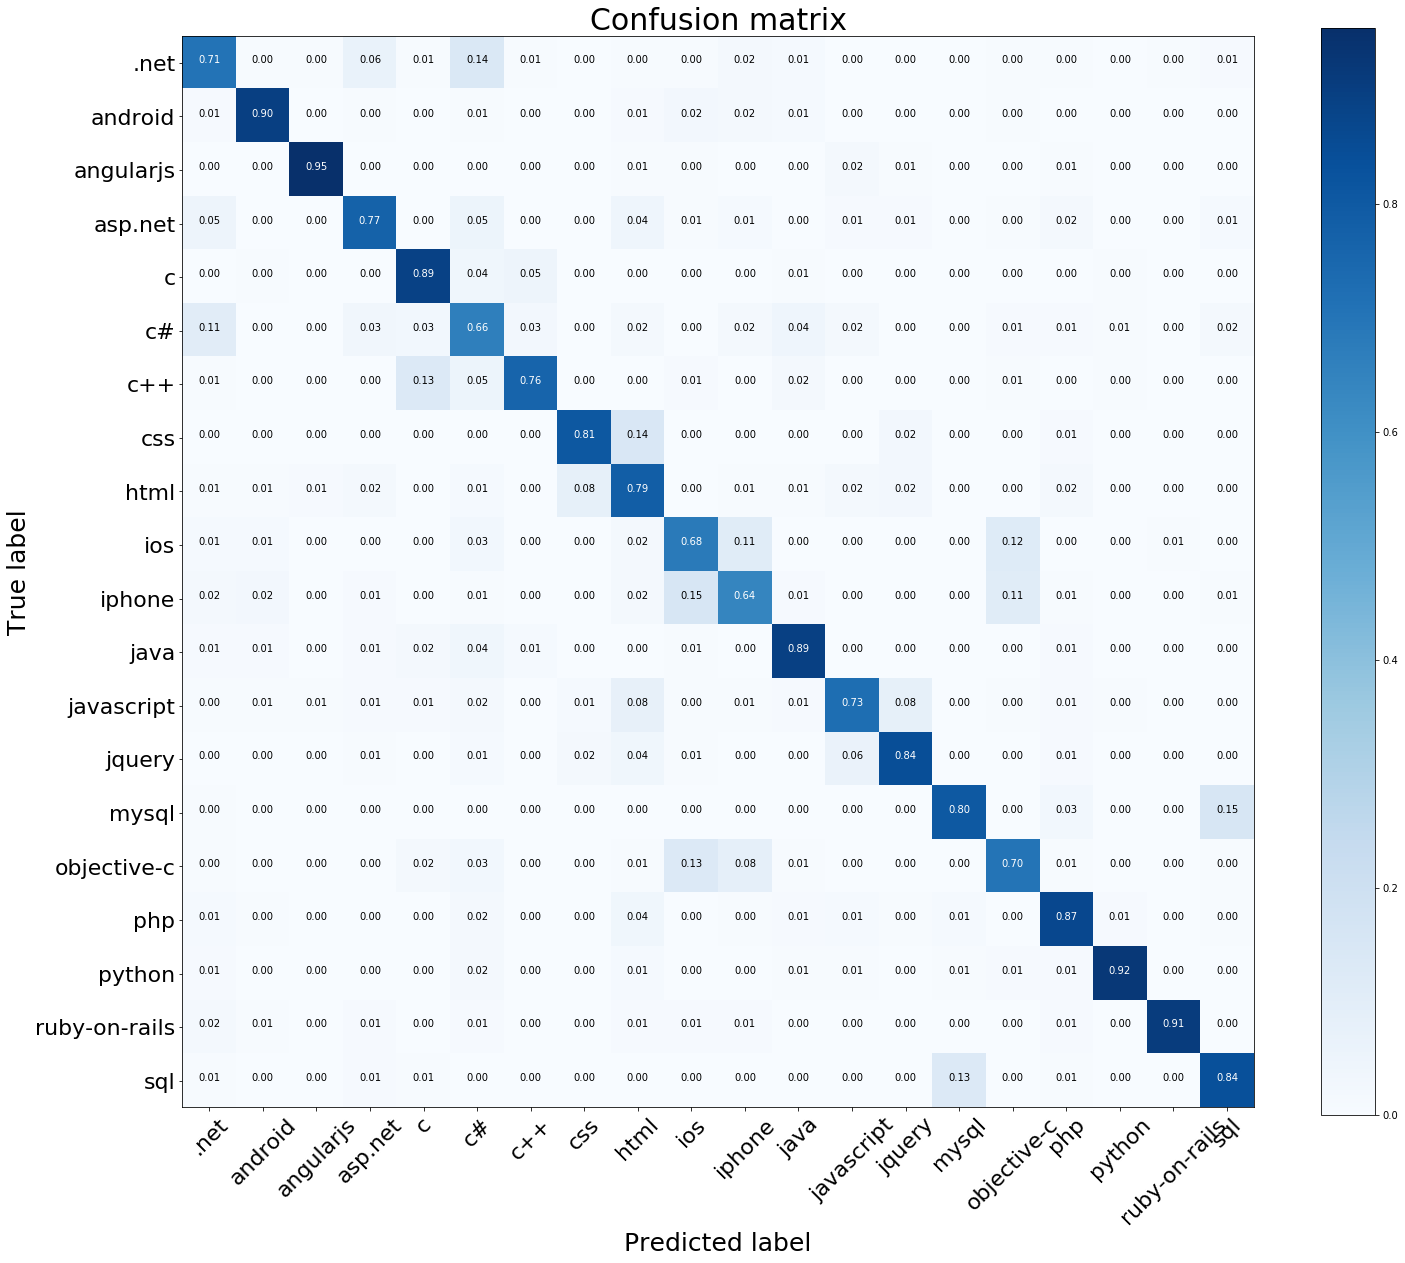

In [29]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()